In [70]:
from copy import deepcopy
from aocd import get_data
from collections import deque
from itertools import permutations
import math
import re

r="""19, 13, 30 @ -2,  1, -2
18, 19, 22 @ -1, -1, -2
20, 25, 34 @ -2, -2, -4
12, 31, 28 @ -1, -2, -1
20, 19, 15 @  1, -5, -3"""

low,high=7,27
low,high=200000000000000,400000000000000
r=get_data(day=24, year=2023)
inp=r.split('\n')

pos=[]
vel=[]
N=len(inp)
for i in range(N):
    p,v=inp[i].split(' @ ')
    pos.append([int(j) for j in p.split(', ')])
    vel.append([int(j) for j in v.split(', ')])

def inter(x0,x1,v0,v1):
    if (v1-v0)!=0:
        return (x0-x1)/(v1-v0)
    else:
        return None
        
def solve(x0,x1,y0,y1,vx0,vx1,vy0,vy1):
    try:
        t0 = (vy1*x0 - vy1*x1 - vx1*(y0 - y1))/(vx1*vy0 - vx0*vy1)
        t1 = (vy0*x0 - vy0*x1 - vx0*(y0 - y1))/(vx1*vy0 - vx0*vy1)
        x=x0+t0*vx0
        y=y0+t0*vy0
        #print(t0)
        if t0>=0 and t1>=0:
            return (x,y)
        else:
            return (None,None)
    except:
        return None,None
    
def calcpos(p,v,t):
    return p+v*t

cnt=0
for i1 in range(N):
    for i2 in range(i1+1,N):
        x0,y0,x1,y1=pos[i1][0],pos[i1][1],pos[i2][0],pos[i2][1]
        vx0,vy0,vx1,vy1=vel[i1][0],vel[i1][1],vel[i2][0],vel[i2][1]
        # if vx0*vy1==vx1*vy1:
        #     continue
        #print(x0,y0,vx0,vy0)
        #print(x1,y1,vx1,vy1)
        x,y=solve(x0,x1,y0,y1,vx0,vx1,vy0,vy1)
        
        if x != None:
            #print(i1,i2,x,y)
            if low<=x<=high and low<=y<=high:
                #print('inside')
                cnt+=1
            # else:
            #     print('outside')
                
print(cnt)
               
        

24192


$$
x_p+v_{x,p} t = x + v_x*t 
$$
$$
y_p+v_{y,p} t = x + v_y*t 
$$
$$y_p+v_{z,p} t = x + v_z*t $$

$$
t = \frac{x_p-x}{v_x-v_{x,p}} = \frac{y_p-y}{v_y-v_{y,p}} = \frac{z_p-z}{v_zx-v_{x,p}}
$$


Solve $$x,y,z$$ and $$v_x,v_y,v_z$$ for
$$
(x_p-x)(v_{y}-v_{y,p}) = (v_x-v_{x,p})(y_p-y)
$$
$$
(y_p-y)(v_{z}-v_{z,p}) = (v_y-v_{y,p})(z_p-z)
$$

In [100]:
from copy import deepcopy
from aocd import get_data
from collections import deque
from itertools import permutations
import math
import re
import sympy

r="""19, 13, 30 @ -2,  1, -2
18, 19, 22 @ -1, -1, -2
20, 25, 34 @ -2, -2, -4
12, 31, 28 @ -1, -2, -1
20, 19, 15 @  1, -5, -3"""

r=get_data(day=24, year=2023)
inp=r.split('\n')

pos=[]
vel=[]
N=len(inp)
for i in range(N):
    p,v=inp[i].split(' @ ')
    pos.append([int(j) for j in p.split(', ')])
    vel.append([int(j) for j in v.split(', ')])
  
x,y,z,vx,vy,vz = sympy.symbols('x, y, z, vx, vy, vz')
eq=[]

for i in range(10):
    xp,yp,zp=pos[i]
    vxp,vyp,vzp=vel[i]
    eq.append((xp-x)*(vy-vyp) - (vx-vxp)*(yp-y))
    eq.append((yp-y)*(vz-vzp) - (vy-vyp)*(zp-z))
    
ans=sympy.solve(eq)    
print(ans)
q=ans[0][x]+ans[0][y]+ans[0][z]
print(q)             

[{vx: 139, vy: -93, vz: 245, x: 191146615936494, y: 342596108503183, z: 131079628110881}]
664822352550558


In [46]:
i1=0
i2=1
x0,y0,x1,y1=pos[i1][0],pos[i1][1],pos[i2][0],pos[i2][1]
vx0,vy0,vx1,vy1=vel[i1][0],vel[i1][1],vel[i2][0],vel[i2][1]
solve(x0,x1,y0,y1,vx0,vx1,vy0,vy1)

(14.333333333333332, 15.333333333333334)

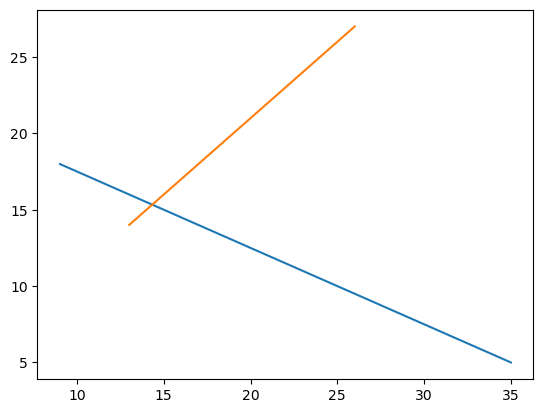

In [40]:
from matplotlib import pyplot as plt

xx0=[x0+vx0*t/100 for t in range(-800,500)]
yy0=[y0+vy0*t/100 for t in range(-800,500)]
xx1=[x1+vx1*t/100 for t in range(-800,500)]
yy1=[y1+vy1*t/100 for t in range(-800,500)]
plt.plot(xx0,yy0,xx1,yy1)



$$
f(x) = \int_{-\infty}^{\infty} e^{-x^2} dx
$$